<a href="https://colab.research.google.com/github/HuynPann511/MACHINE_LEARNING_HK241/blob/main/Practice1_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def h(theta0, theta1, x):
    g = sigmoid(theta0 + theta1*x)
    return g

def cost_function(theta0, theta1, x, y):
    m = x.shape[0]
    y_pred = h(theta0, theta1, x)
    epsilon = 1e-6
    return -(1 / m) * sum(y*np.log(y_pred + epsilon) + (1 - y)*np.log(1 - y_pred + epsilon))

def gd(theta0, theta1, x, y, learning_rate, n):
    m = x.shape[0]
    history = {"theta0": [], "theta1": [], "it": [], "grad_norm": [], "cost_function": []}

    for it in range(n):
        y_pred = h(theta0, theta1, x)
        grad0 = (1 / m) * np.sum(y_pred - y)
        grad1 = (1 / m) * np.sum((y_pred - y)*x)
        theta0 = theta0 - learning_rate*grad0
        theta1 = theta1 - learning_rate*grad1
        grad_norm = np.linalg.norm([theta0, theta1])

        history["theta0"].append(theta0)
        history["theta1"].append(theta1)
        history["it"].append(it)
        history["grad_norm"].append(grad_norm)
        history["cost_function"].append(cost_function(theta0, theta1, x, y))
    return (theta0, theta1, history)


In [11]:
x = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4, 0.409, 0.421,
              0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

theta0 = np.random.rand()
theta1 = np.random.rand()
learning_rate = 1e-6
n = 100 # n is number of interactions

theta0:  0.4969795570485428
theta1:  0.5632281414626932
cost_function:  0.6082992532494984


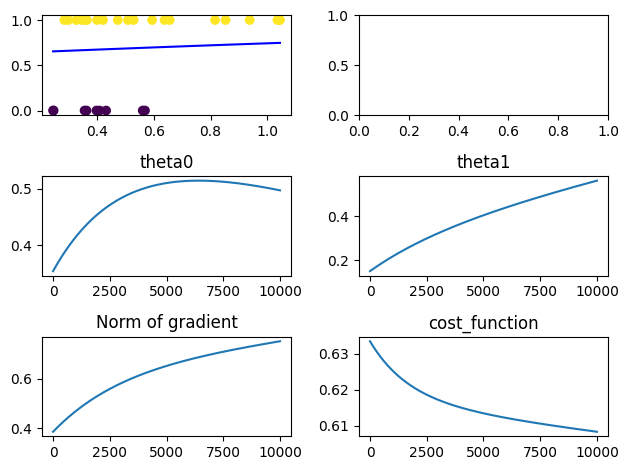

In [12]:
theta0 = np.random.rand()
theta1 = np.random.rand()
learning_rate = 1e-3
n = 10000

(theta0_opt, theta1_opt, history) = gd(theta0, theta1, x, y, learning_rate, n)

fig, axs = plt.subplots(3, 2)

axs[1, 0].set_title("theta0")
axs[1, 0].plot(history["theta0"])

axs[1, 1].set_title("theta1")
axs[1, 1].plot(history["theta1"])

axs[2, 0].set_title("Norm of gradient")
axs[2, 0].plot(history["grad_norm"])

axs[2, 1].set_title("cost_function")
axs[2, 1].plot(history["cost_function"])

axs[0, 0].scatter(x, y, c=y)
axs[0, 0].plot(x, h(theta0_opt, theta1_opt, x), color="blue")

fig.tight_layout()

print("theta0: ", theta0_opt)
print("theta1: ", theta1_opt)
print("cost_function: ", history["cost_function"][-1])